<a href="https://colab.research.google.com/github/CaioPassos3/TrabalhoIA/blob/main/Lista4Compt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

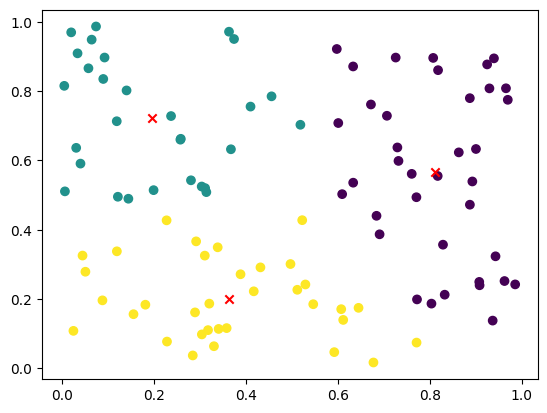

Centroides finais: [[0.81167067 0.56668218]
 [0.19671223 0.72161646]
 [0.36376248 0.20008043]]


In [4]:
#Implementando K-Means

# Gerar dados de exemplo
np.random.seed(42)
data = np.random.rand(100, 2)

# Número de clusters
k = 3

# Inicializar os centroides aleatoriamente
centroids = data[np.random.choice(data.shape[0], k, replace=False)]

def plot_clusters(data, centroids, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.show()

def kmeans(data, k, max_iters=100):
    # Inicializar os centroides aleatoriamente
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Atribuição dos pontos aos clusters
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Recalcular os centroides
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Verificar convergência
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Executar o algoritmo k-means
final_centroids, labels = kmeans(data, k)

# Plotar os clusters finais
plot_clusters(data, final_centroids, labels)

print("Centroides finais:", final_centroids)

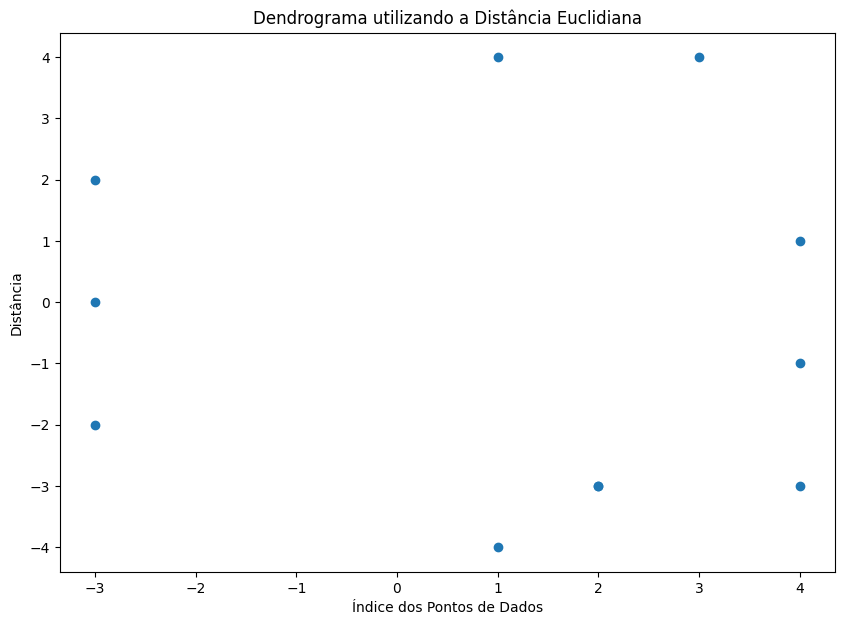

In [6]:
#Implementando Hierarchical Clustering

# Dados fornecidos
data = np.array([
    [-3, 0], [-3, 2], [-3, -2], [1, -4], [1, 4],
    [2, -3], [2, -3], [3, 4], [4, 1], [4, -1], [4, -3]
])

# Função para calcular a distância euclidiana
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Construir a matriz de distâncias
def create_distance_matrix(data):
    n = data.shape[0]
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distance_matrix[i, j] = euclidean_distance(data[i], data[j])
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

# Função para realizar o agrupamento hierárquico
def hierarchical_clustering(data):
    distance_matrix = create_distance_matrix(data)
    clusters = [[i] for i in range(len(data))]
    while len(clusters) > 1:
        min_dist = float('inf')
        to_merge = (0, 1)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = np.mean([distance_matrix[p1, p2] for p1 in clusters[i] for p2 in clusters[j]])
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)
        clusters[to_merge[0]].extend(clusters[to_merge[1]])
        del clusters[to_merge[1]]
    return clusters

# Plotar o dendrograma
def plot_dendrogram(data, clusters):
    plt.figure(figsize=(10, 7))
    for cluster in clusters:
        points = data[cluster]
        plt.scatter(points[:, 0], points[:, 1])
    plt.title('Dendrograma utilizando a Distância Euclidiana')
    plt.xlabel('Índice dos Pontos de Dados')
    plt.ylabel('Distância')
    plt.show()

# Executar o agrupamento hierárquico
clusters = hierarchical_clustering(data)

# Plotar o dendrograma
plot_dendrogram(data, clusters)

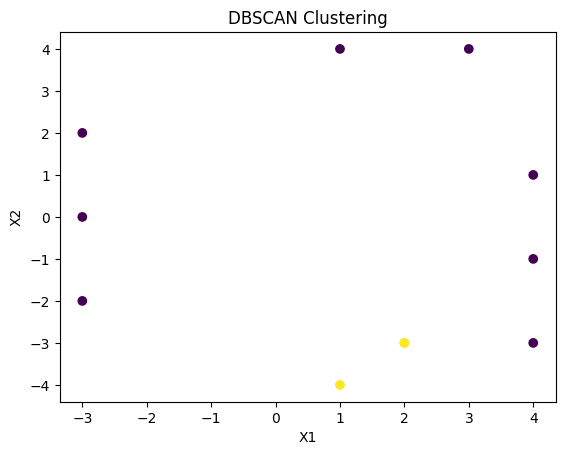

In [8]:
#Implementando DBSCAN

# Dados fornecidos
data = np.array([
    [-3, 0], [-3, 2], [-3, -2], [1, -4], [1, 4],
    [2, -3], [2, -3], [3, 4], [4, 1], [4, -1], [4, -3]
])

# Parâmetros do DBSCAN
eps = 1.5  # Raio de vizinhança
min_samples = 2  # Número mínimo de pontos para formar um cluster

# Função para calcular a distância euclidiana
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Função para encontrar vizinhos
def region_query(data, point_idx, eps):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_idx], data[i]) < eps:
            neighbors.append(i)
    return neighbors

# Função para expandir o cluster
def expand_cluster(data, labels, point_idx, cluster_id, eps, min_samples):
    neighbors = region_query(data, point_idx, eps)
    if len(neighbors) < min_samples:
        labels[point_idx] = -1  # Marca como ruído
        return False
    else:
        labels[point_idx] = cluster_id
        for neighbor in neighbors:
            if labels[neighbor] == 0:
                labels[neighbor] = cluster_id
                expand_cluster(data, labels, neighbor, cluster_id, eps, min_samples)
        return True

# Função principal do DBSCAN
def dbscan(data, eps, min_samples):
    labels = np.zeros(len(data))
    cluster_id = 0
    for i in range(len(data)):
        if labels[i] == 0:
            if expand_cluster(data, labels, i, cluster_id + 1, eps, min_samples):
                cluster_id += 1
    return labels

# Executar o algoritmo DBSCAN
labels = dbscan(data, eps, min_samples)

# Plotar os clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Por inspeção visual, o algoritmo K-Means obteve um resultado bastante próximo do ideal, principalmente pela separação clara dos clusters, distribuição de pontos e posição dos centroides.
Não consegui gerar um dendograma para o algoritmo de Hierarchical Clustering, o que não deixou possível dizer visualmente se o resultado foi próximo ao ideal.
Por inspeção visual, o algoritmo DBSCAN obteve um resultado razoavelmente bom, principalmente pela forma e densidade dos clusters, além da identificação dos outliers.